<a href="https://colab.research.google.com/github/SYJOO99/Public_Big_Data/blob/main/35_data_PCA%2BCLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA - 229차원을 3차원으로 차원 축소**

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 35_data.csv to 35_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['35_data.csv']))

In [4]:
data = pd.DataFrame(df)
data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229
0,0.109088,0.054415,0.040667,0.778914,0.636808,0.882409,0.805532,0.792475,0.601380,0.265406,0.704014,0.915148,0.671103,0.805532,0.636808,0.454160,0.491169,0.764859,0.841606,0.313045,0.704014,0.619219,0.528254,0.601380,0.654114,0.054415,0.085199,0.872983,0.778914,0.671103,0.735325,0.399482,0.078178,0.435784,0.959528,0.182514,0.454160,0.980811,0.265406,0.208165,...,0.863044,0.872983,0.313045,0.792475,0.015325,0.565096,0.980811,0.158935,0.250386,0.100642,0.417545,0.280871,0.992715,0.221750,0.092683,0.546725,0.085199,0.792475,0.265406,0.004311,0.137446,0.528254,0.118032,0.719882,0.078178,0.750324,0.147930,0.296759,0.182514,0.085199,0.049473,0.100642,0.417545,0.235829,0.805532,0.085199,0.399482,0.127482,0.329706,0.250386
1,0.238400,0.595700,0.856700,0.788900,0.806400,0.367100,0.775700,0.785100,0.804500,0.733800,0.788000,0.793600,0.597300,0.905600,0.819600,0.819600,0.705700,0.735100,0.485300,0.779100,0.850400,0.759600,0.519800,0.692900,0.549800,0.009100,0.000600,0.025400,0.548500,0.352600,0.207700,0.586200,0.461700,0.474700,0.224700,0.180300,0.880900,0.157700,0.180000,0.082400,...,0.047000,0.725400,0.326500,0.265300,0.615700,0.361700,0.400900,0.929400,0.122400,0.550200,0.889100,0.815800,0.018700,0.703900,0.234600,0.475100,0.569900,0.761100,0.776600,0.807600,0.385200,0.456500,0.138200,0.269000,0.215100,0.711600,0.255700,0.351800,0.225000,0.380200,0.019500,0.297300,0.803900,0.519800,0.920600,0.893200,0.589400,0.356800,0.776000,0.776000
2,0.000000,0.000500,0.395400,0.421700,0.364800,0.139900,0.567500,0.478500,0.600400,0.632700,0.426600,0.629500,0.071400,0.525600,0.433300,0.606900,0.410100,0.595500,0.161600,0.369600,0.631100,0.069700,0.000200,0.177600,0.217500,0.048900,0.000000,0.127200,0.597100,0.190000,0.403600,0.584000,0.580700,0.425000,0.598800,0.569100,0.757400,0.418300,0.403600,0.559100,...,0.491900,0.631100,0.615000,0.598800,0.624700,0.588900,0.611800,0.703100,0.619900,0.597100,0.714700,0.659400,0.582400,0.631100,0.643700,0.716100,0.664000,0.683800,0.656300,0.542400,0.410100,0.629500,0.616600,0.626300,0.640600,0.677800,0.384100,0.527300,0.567500,0.708900,0.544100,0.640600,0.643700,0.648500,0.670100,0.674700,0.629500,0.616600,0.539100,0.539100
3,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.412851,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,0.234524,...,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.436370,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.058700,0.680564,0.680564
4,0.030300,0.033100,0.015600,0.022400,0.197800,0.056200,0.149400,0.144800,0.147100,0.123300,0.031000,0.140400,0.002800,0.036200,0.008800,0.090500,0.017600,0.062100,0.015200,0.036200,0.058500,0.037000,0.203400,0.000400,0.016800,0.166300,0.179000,0.142600,0.238900,0.267600,0.050800,0.065900,0.297900,0.340600,0.315400,0.214900,0.727800,0.428000,0.069800,0.060900,...,0.849600,0.865300,0.867500,0.844900,0.697200,0.527000,0.628100,0.792600,0.931000,0.849600,0.511100,0.359100,0.916800,0.947700,0.348000,0.762900,0.519100,0.957500,0.628100,0.511100,0.351600,0.570400,0.881900,0.809300,0.672400,0.840100,0.601500,0.672400,0.809300,0.744100,0.463400,0.781000,0.396900,0.858700,0.113500,0.822500,0.927000,0.968000,0.747300,0.747300
5,0.842704,0.842704,0.842704,0.842704,0.842704,0.842704,0.842704,0.842704,0.842704,0.842704,0.

In [5]:
X = np.empty((35, 229))

In [7]:
columns = list(df.columns)

In [8]:
for i in range(0, 229):
  X[:,i] = df[columns[i]]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(data)
data_scaled = pd.DataFrame(result, columns=df.columns)
data_scaled.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229
count,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,...,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,8.168069e-17,1.030921e-16,5.233909e-16,6.026925e-17,9.198991e-17,2.569373e-16,-2.125284e-16,-1.586033e-16,-5.075305e-17,-4.155406e-16,-1.268826e-17,-1.395709e-16,4.916702e-16,3.933362e-16,8.247371e-17,-1.903239e-16,2.664535e-16,3.330669e-16,-1.903239e-17,-3.838200e-16,3.394110e-16,4.567775e-16,2.965882e-16,2.823139e-16,3.806479e-16,-1.015061e-16,1.268826e-17,-2.664535e-16,-3.298948e-16,-1.459150e-16,-1.966681e-16,-5.773160e-16,0.000000,1.459150e-16,-8.881784e-17,-3.235507e-16,3.108624e-16,-5.455953e-16,-2.664535e-16,4.440892e-17,...,-2.664535e-16,-6.978545e-17,-2.537653e-17,-5.709718e-17,-6.344132e-18,1.966681e-16,1.268826e-16,-3.743038e-16,1.015061e-16,1.141944e-16,5.709718e-17,-2.537653e-17,4.694657e-16,-1.966681e-16,3.172066e-16,-3.172066e-16,6.724779e-16,-3.806479e-16,1.839798e-16,9.516197e-17,-1.490871e-16,-1.903239e-17,9.833404e-17,1.966681e-16,-1.268826e-17,9.516197e-17,-6.344132e-18,-3.584434e-16,6.344132e-18,2.759697e-16,1.934960e-16,1.934960e-16,3.267228e-16,-2.886580e-16,-4.123686e-17,1.839798e-16,-2.791418e-16,-2.981742e-16,3.552714e-16,2.537653e-17
std,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,...,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00,1.014599e+00
min,-1.204022e+00,-1.314690e+00,-1.807385e+00,-1.875976e+00,-1.662832e+00,-1.846168e+00,-2.010177e+00,-1.813195e+00,-2.000746e+00,-1.696065e+00,-1.721563e+00,-1.994711e+00,-1.733444e+00,-1.685910e+00,-1.530649e+00,-2.094071e+00,-1.731750e+00,-1.856944e+00,-1.603619e+00,-1.648190e+00,-1.846657e+00,-1.631510e+00,-1.498655e+00,-1.737749e+00,-1.865091e+00,-1.423054e+00,-1.710569e+00,-1.490269e+00,-2.055384e+00,-1.996523e+00,-1.673521e+00,-1.742516e+00,-1.919959,-1.992380e+00,-2.043012e+00,-1.762264e+00,-1.824673e+00,-1.772400e+00,-1.767798e+00,-1.7

In [10]:
pca = PCA(n_components=3)
result = pca.fit(X)

In [11]:
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y", "z"])
result

,x,y,z
0,-3.168204,-2.156263,5.982062
1,-1.635880,1.308540,3.249636
2,2.417750,4.418932,2.508852
3,5.477824,0.933670,9.227405
4,9.171116,5.254672,4.937398
5,-3.505305,-3.159357,-1.413085
6,2.660954,-1.698699,5.551352
7,-4.880674,-6.206627,-4.005130
8,-3.370705,-1.063950,5.188870
9,3.416470,-0.574310,4.719524




---



# **PCA 시각화**

findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.


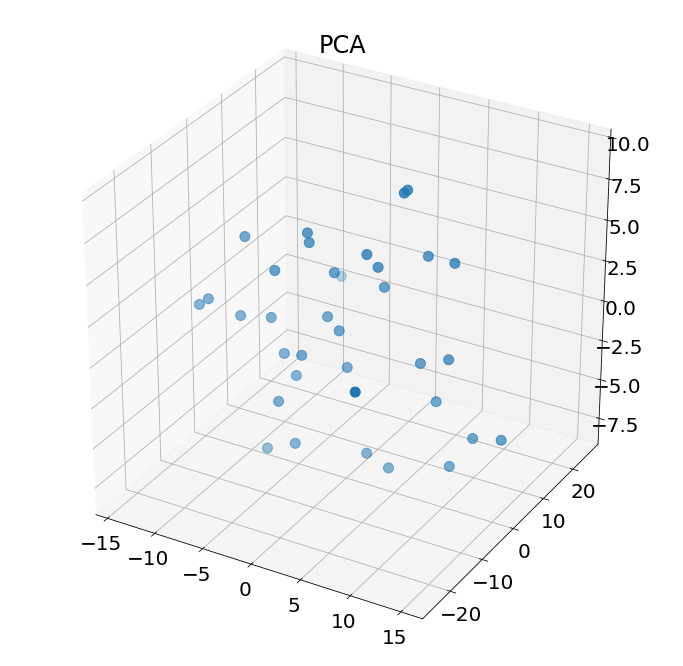

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화

plt.rcParams["figure.figsize"] = (12, 12)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['x'], result['y'], result['z'], s=100)
plt.title('PCA')
plt.show()



---

# **OPTIMIZE K**

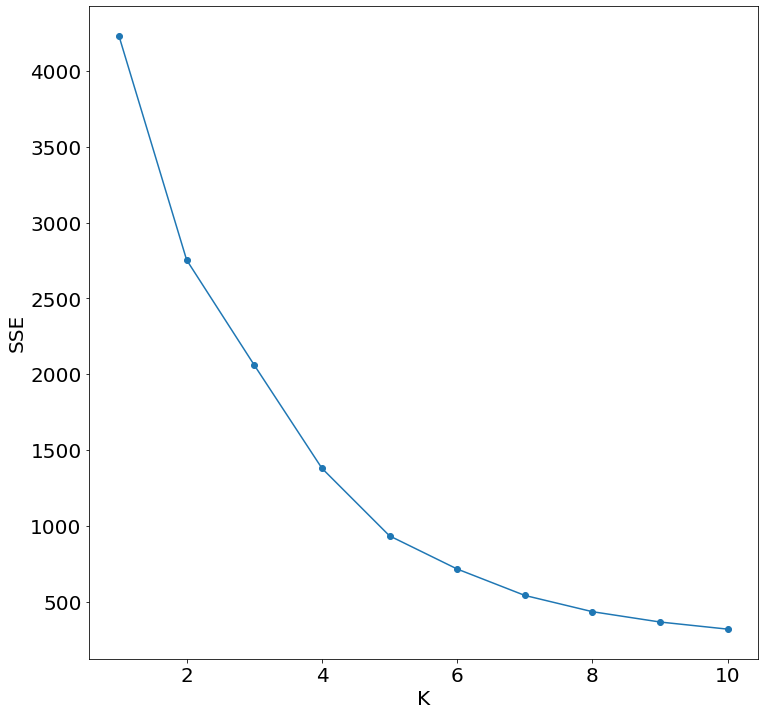

In [13]:
from sklearn.cluster import KMeans

def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(result)

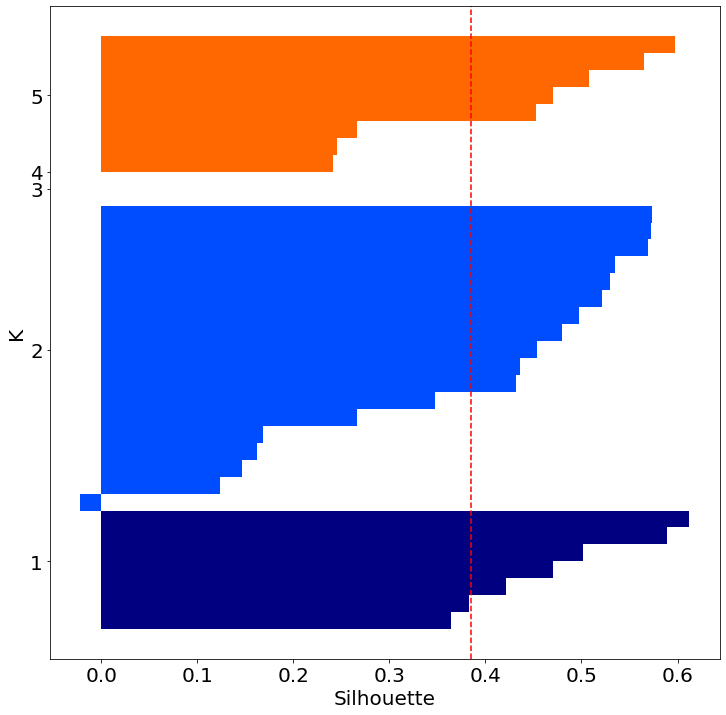

In [17]:
# 실루엣 기법
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('Silhouette')
    plt.show()

k = 5

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(result)
plotSilhouette(result, y_km)



---

# **CLUSTERING (K = 5)**

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 5
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(result)
predict = pd.DataFrame(model.predict(result))
predict.columns=['predict']

In [20]:
# 결과 합치기
final_df = pd.DataFrame(np.hstack((predict, result)))
# 컬럼명 지정
cols = ['x', 'y', 'z']
cols.insert(0,'group')
final_df.columns = cols

In [21]:
final_df

,group,x,y,z
0,0.0,-3.168204,-2.156263,5.982062
1,0.0,-1.635880,1.308540,3.249636
2,4.0,2.417750,4.418932,2.508852
3,4.0,5.477824,0.933670,9.227405
4,4.0,9.171116,5.254672,4.937398
5,0.0,-3.505305,-3.159357,-1.413085
6,4.0,2.660954,-1.698699,5.551352
7,0.0,-4.880674,-6.206627,-4.005130
8,0.0,-3.370705,-1.063950,5.188870
9,4.0,3.416470,-0.574310,4.719524


In [22]:
final_df.to_excel('clustering_35.xlsx')

In [23]:
# 숫자 to 그룹명 변경
group_name = {0: 'red',
               1: 'orange',
               2: 'green',
              3: 'blue',
              4: 'purple'}

final_df['group'] = final_df['group'].replace(group_name)

In [24]:
feature_df = pd.DataFrame(final_df)
feature_df

,group,x,y,z
0,red,-3.168204,-2.156263,5.982062
1,red,-1.635880,1.308540,3.249636
2,purple,2.417750,4.418932,2.508852
3,purple,5.477824,0.933670,9.227405
4,purple,9.171116,5.254672,4.937398
5,red,-3.505305,-3.159357,-1.413085
6,purple,2.660954,-1.698699,5.551352
7,red,-4.880674,-6.206627,-4.005130
8,red,-3.370705,-1.063950,5.188870
9,purple,3.416470,-0.574310,4.719524


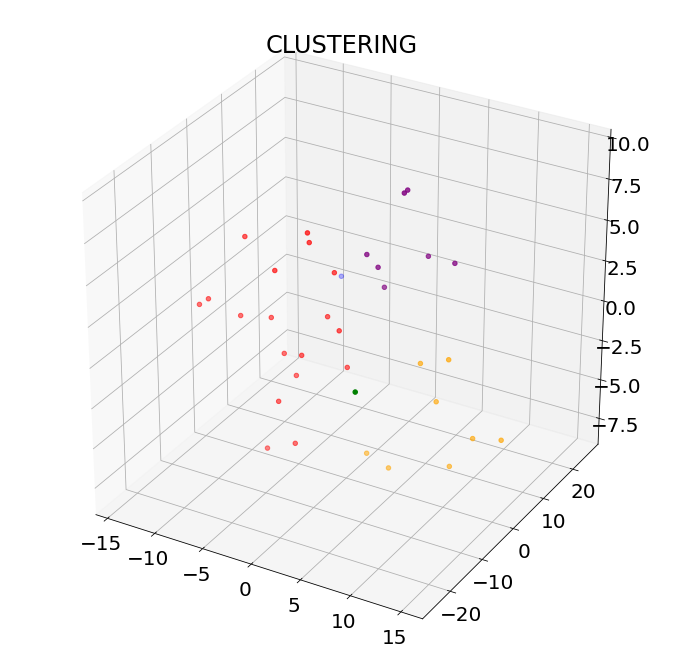

In [25]:
plt.rcParams["figure.figsize"] = (12, 12)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature_df['x'], feature_df['y'], feature_df['z'], c=final_df['group'])
plt.title('CLUSTERING')
plt.show()